In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [ ]:
# Load dataset
df = pd.read_csv("/content/2017 Victims of Rape.csv")  # Ensure file is uploaded to Colab

# Display first few rows
print(df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values (drop columns with >30% missing values, fill others with median)
thresh = 0.3 * df.shape[0]
df = df.dropna(thresh=thresh, axis=1)



   S. No Category           State/UT  Cases Reported  \
0      1    State     Andhra Pradesh             988   
1      2    State  Arunachal Pradesh              59   
2      3    State              Assam            1772   
3      4    State              Bihar             605   
4      5    State       Chhattisgarh            1908   

   Child Victims of Rape (Below 18 Yrs) - Below 6 Years  \
0                                                 14      
1                                                  1      
2                                                  2      
3                                                  0      
4                                                 47      

   Child Victims of Rape (Below 18 Yrs) - 6 Years & Above - Below 12 Years  \
0                                                 46                         
1                                                  9                         
2                                                 44                      

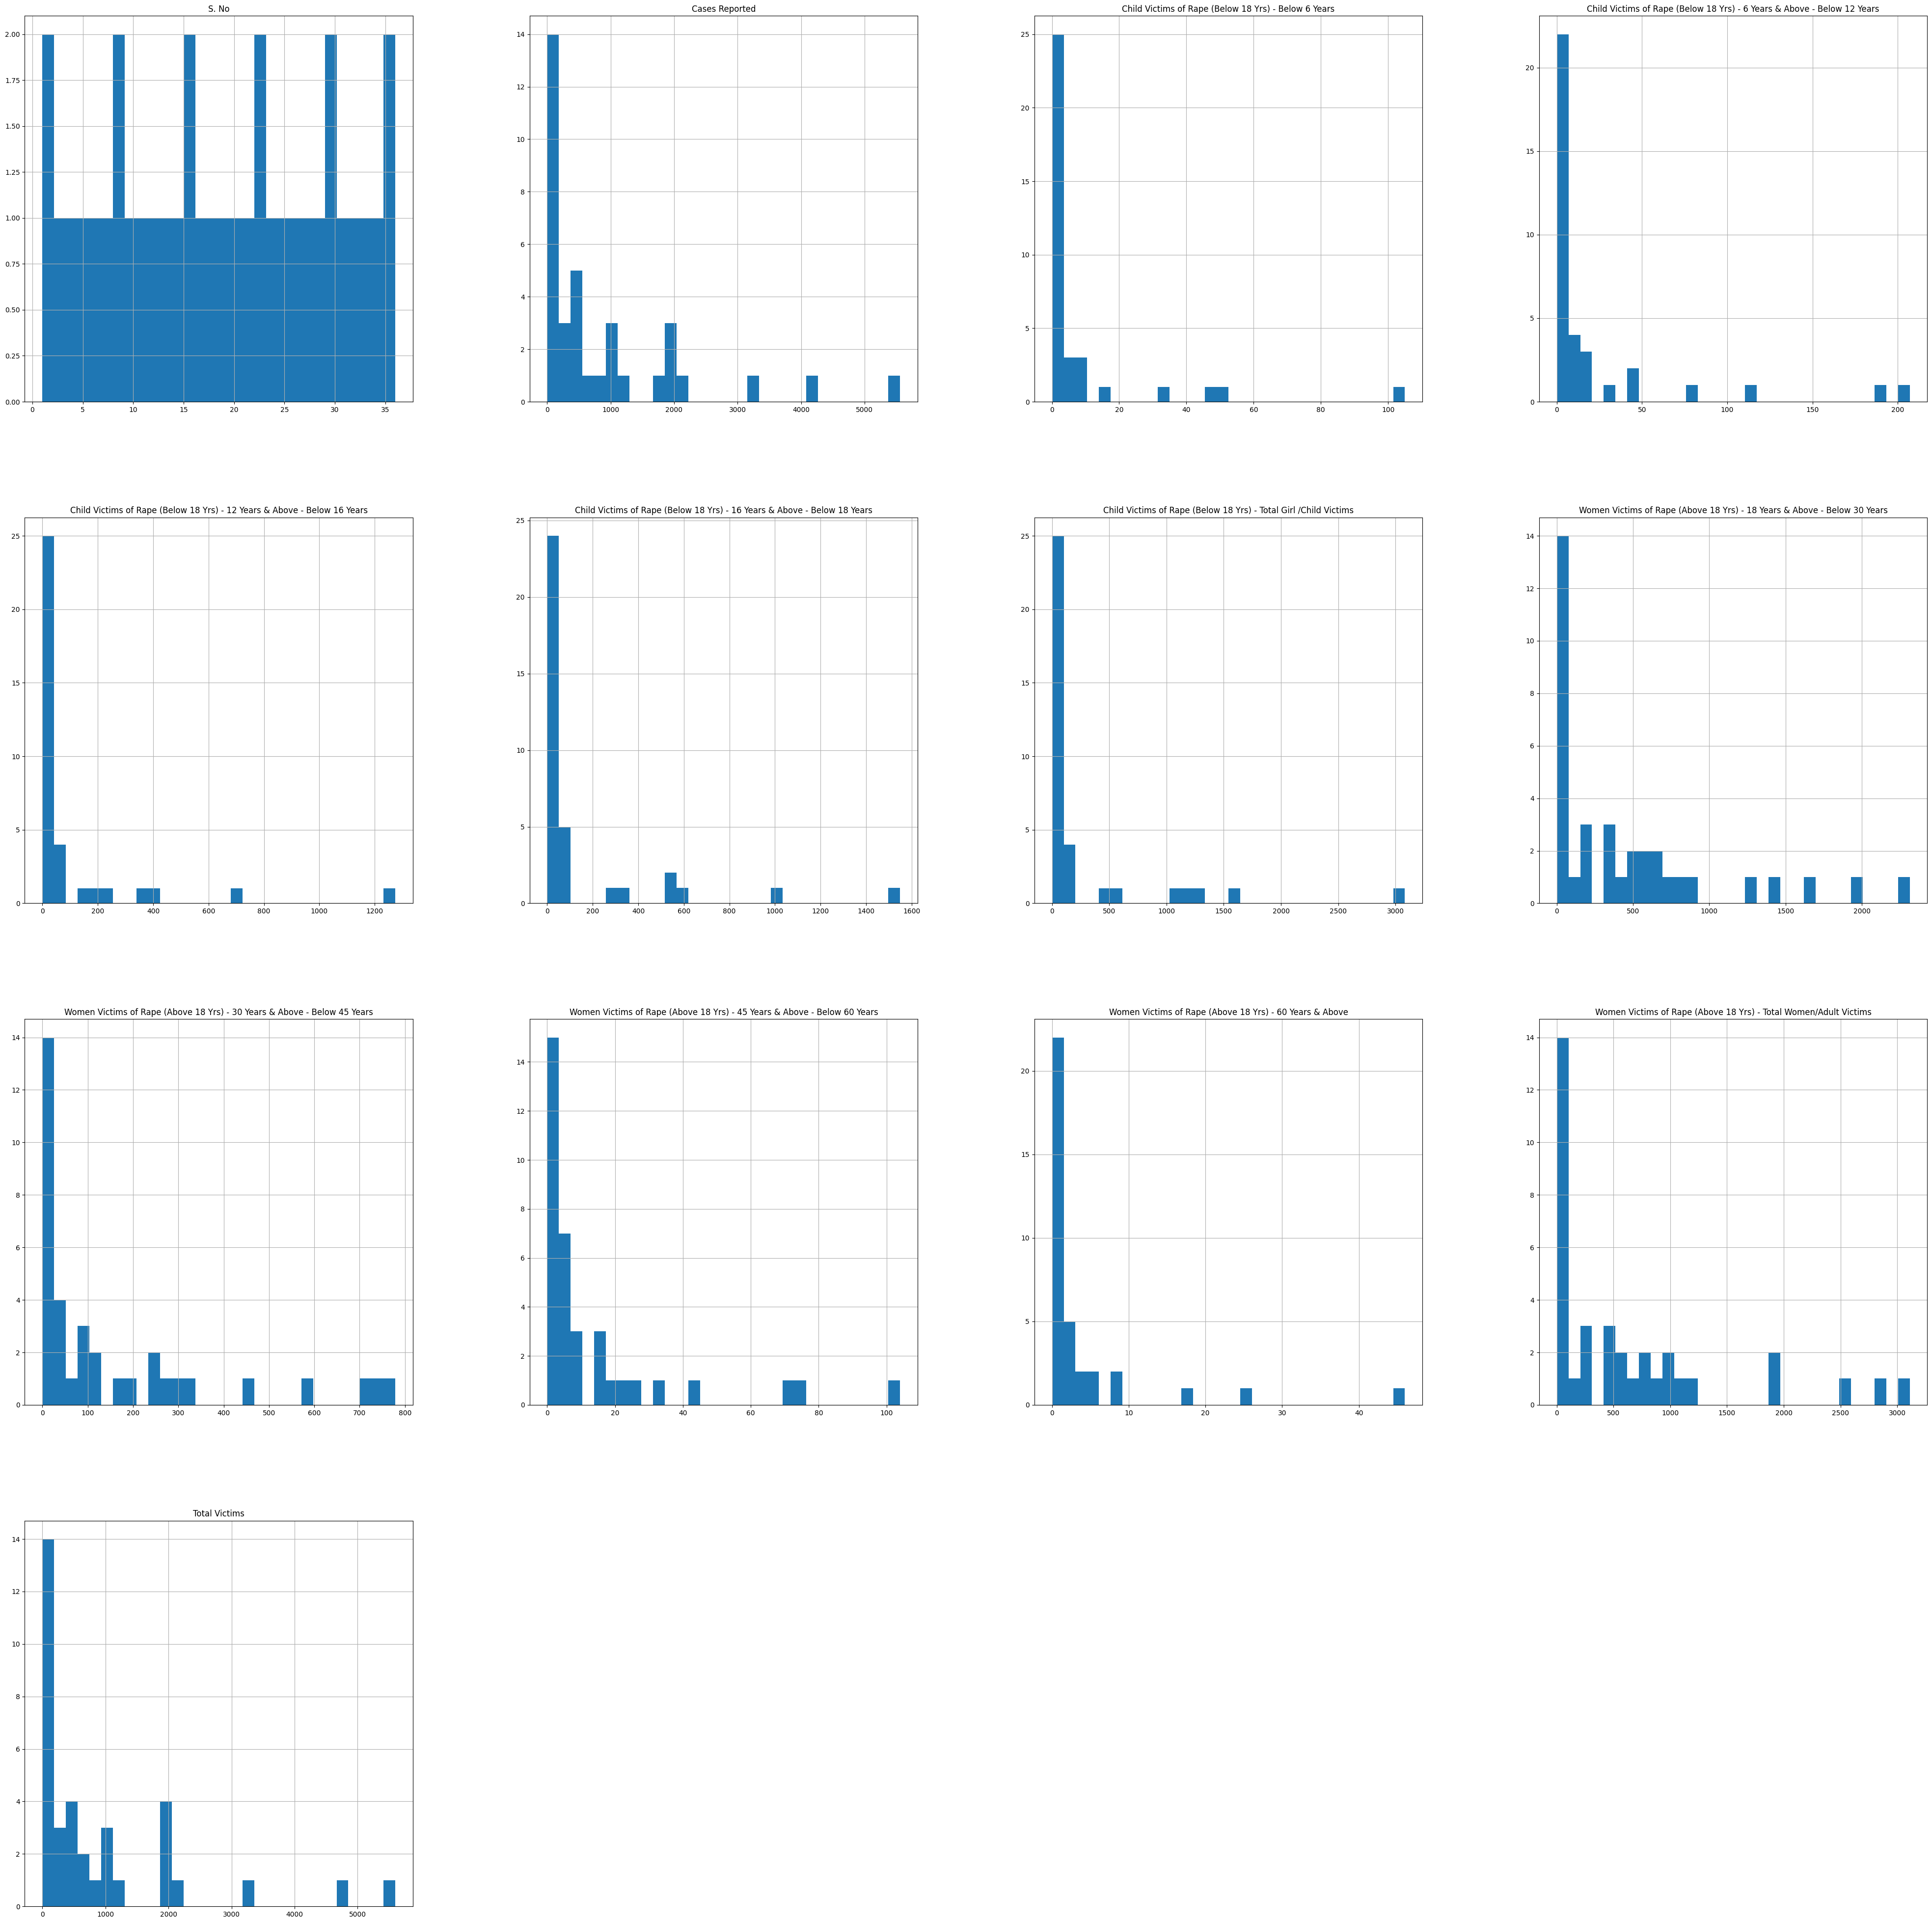

In [ ]:
# Fill only numeric columns with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Histogram for numerical columns
df[num_cols].hist(figsize=(50, 50), bins=30)
plt.show()

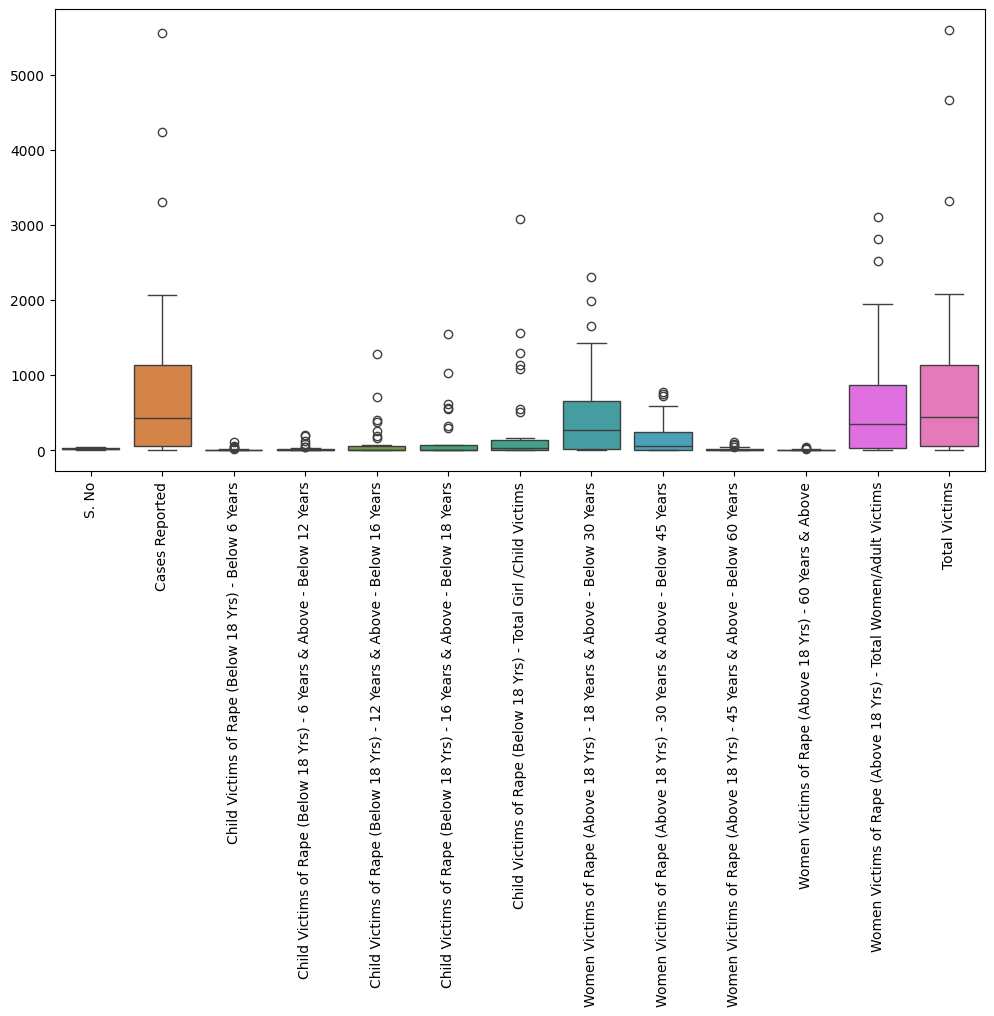

In [ ]:
# Box Plot before Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

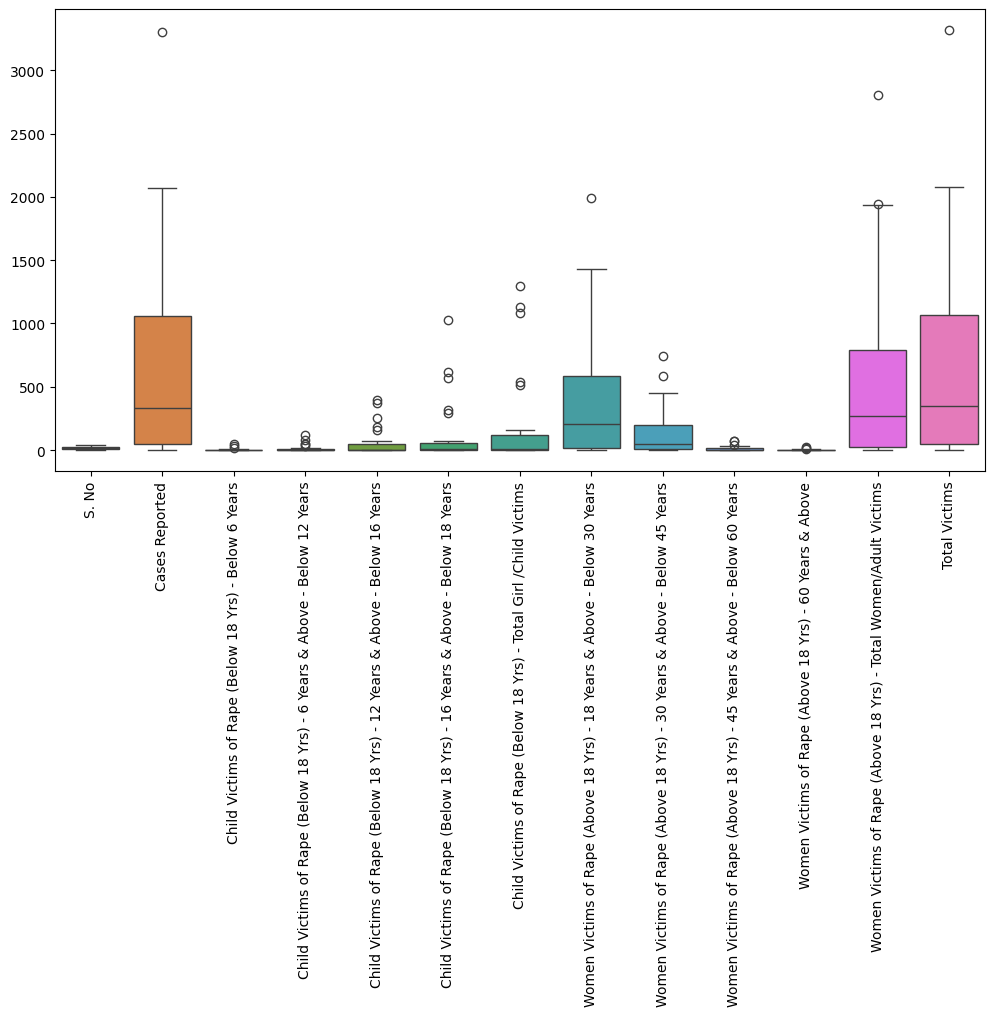

In [ ]:
# Outlier Removal (Z-score method)
df = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

# Box Plot after Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

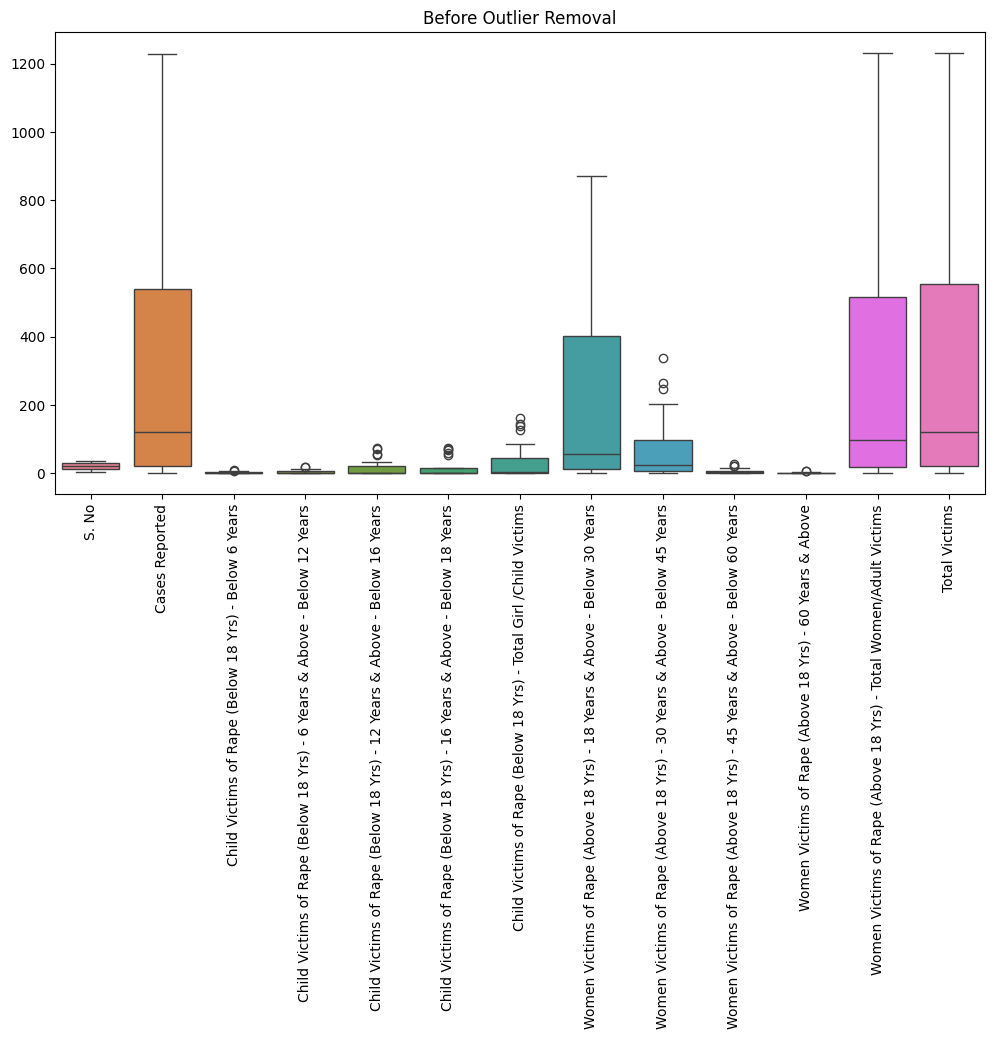

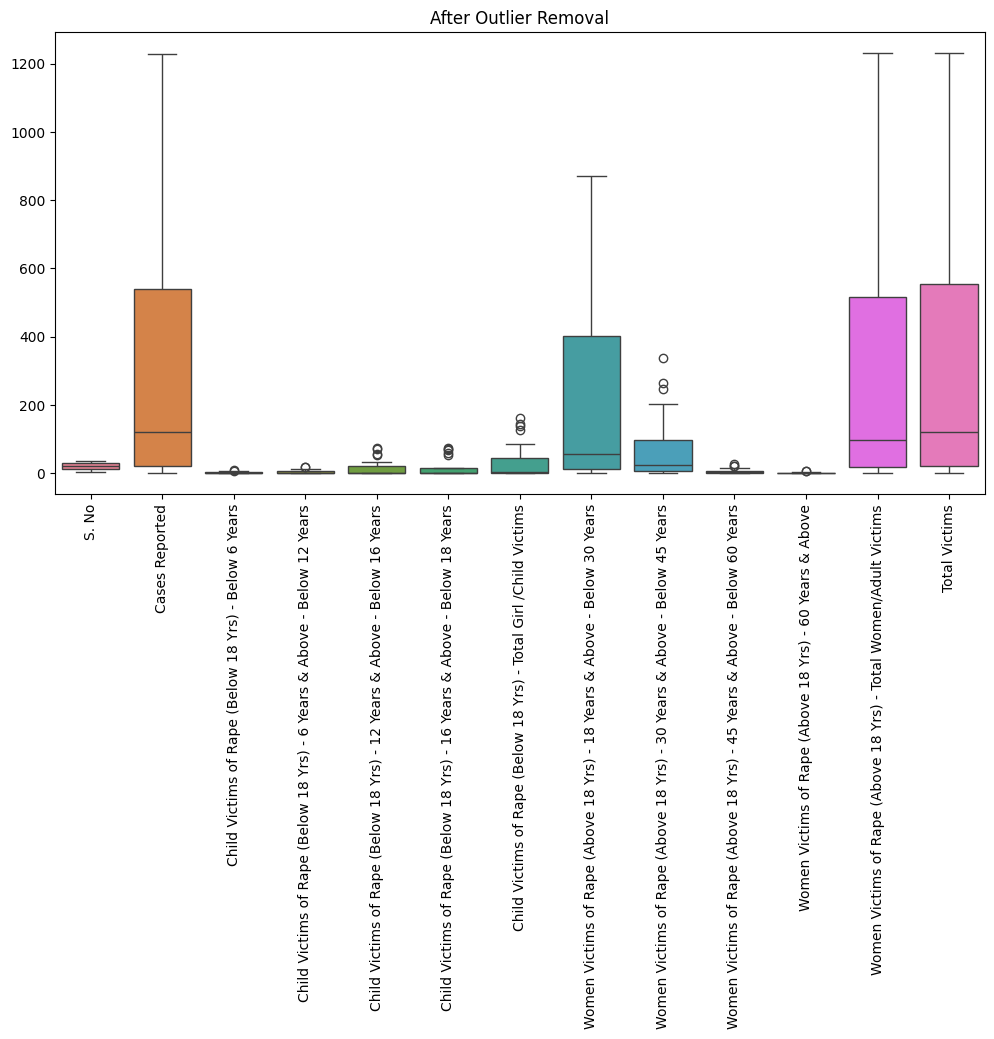

Final dataset shape after outlier removal: (27, 15)


In [ ]:
############
# Handling missing values (drop columns with >30% missing values, fill others with median)
thresh = 0.3 * df.shape[0]
df = df.dropna(thresh=thresh, axis=1)  # Drop columns with >30% missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill remaining missing values with median

# Identify numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Box Plot before Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Before Outlier Removal")
plt.show()

# Outlier Removal (Z-score method)
df = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

# Box Plot after Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("After Outlier Removal")
plt.show()

# Display final dataset shape
print("Final dataset shape after outlier removal:", df.shape)

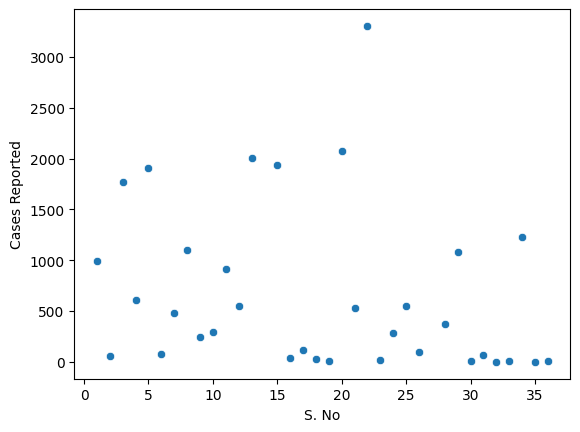

Skewness:
 S. No                                                                       0.021314
Cases Reported                                                              1.485556
Child Victims of Rape (Below 18 Yrs) - Below 6 Years                        3.541840
Child Victims of Rape (Below 18 Yrs) - 6 Years & Above - Below 12 Years     2.963776
Child Victims of Rape (Below 18 Yrs) - 12 Years & Above - Below 16 Years    2.472586
Child Victims of Rape (Below 18 Yrs) - 16 Years & Above - Below 18 Years    3.017022
Child Victims of Rape (Below 18 Yrs) - Total Girl /Child Victims            2.507169
Women Victims of Rape (Above 18 Yrs) - 18 Years & Above - Below 30 Years    1.708722
Women Victims of Rape (Above 18 Yrs) - 30 Years & Above - Below 45 Years    1.958033
Women Victims of Rape (Above 18 Yrs) - 45 Years & Above - Below 60 Years    2.409224
Women Victims of Rape (Above 18 Yrs) - 60 Years & Above                     3.343478
Women Victims of Rape (Above 18 Yrs) - Total Women/Adu

In [ ]:
# Scatterplot (choosing first two numerical columns dynamically)
if len(num_cols) >= 2:
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.show()

# Skewness & Kurtosis
skewness_values = df[num_cols].skew().mean()
kurtosis_values = df[num_cols].kurtosis().mean()
print("Skewness:\n", df[num_cols].skew())
print("Kurtosis:\n", df[num_cols].kurtosis())

<ipython-input-12-415477d6e1f8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_scores, palette='coolwarm')


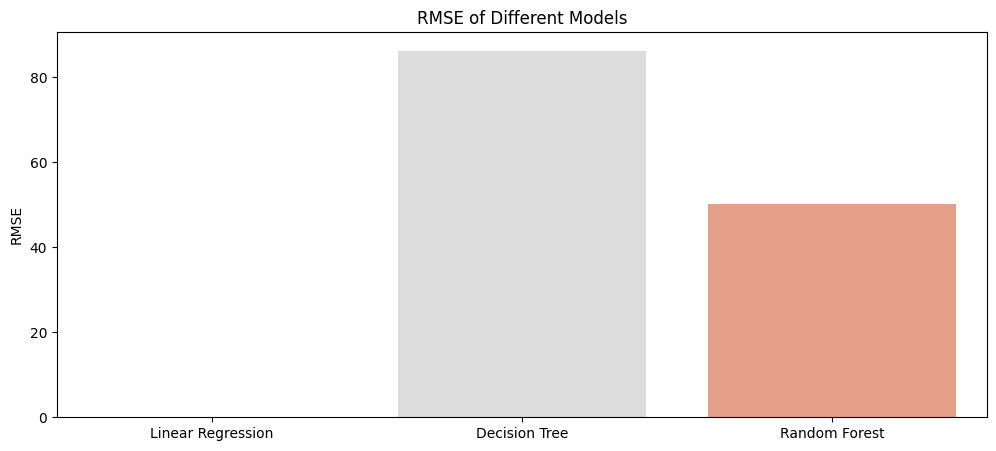

<ipython-input-12-415477d6e1f8>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='viridis')


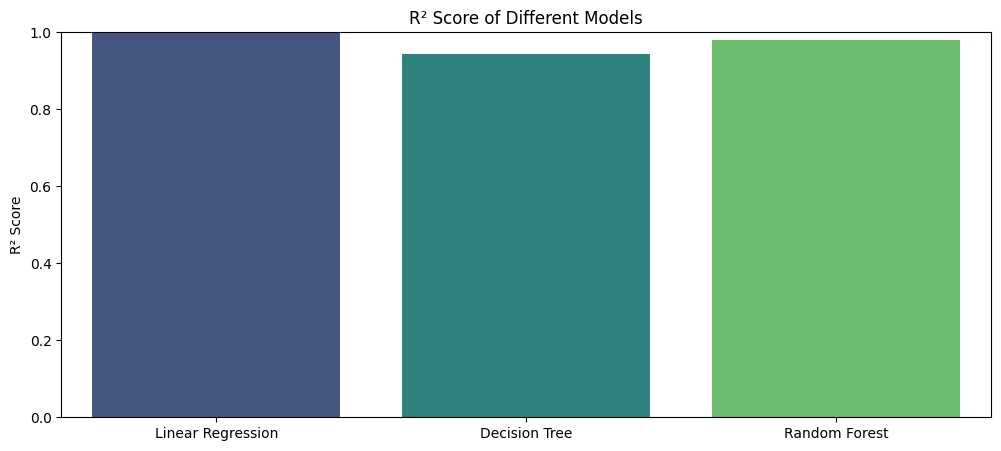

In [ ]:
######## Assuming df and num_cols are defined
if 'price' in df.columns:
    target_col = 'price'
else:
    target_col = df.columns[-1]

X = df[num_cols].drop(columns=[target_col], errors='ignore')
y = df[target_col]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Dictionaries to store RMSE and R² scores
rmse_values = {}
r2_values = {}

# Train and predict
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_values[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_values[name] = r2_score(y_test, y_pred)

# Convert results to lists
model_names = list(models.keys())
rmse_scores = list(rmse_values.values())
r2_scores = list(r2_values.values())

# Plot RMSE
plt.figure(figsize=(12, 5))
sns.barplot(x=model_names, y=rmse_scores, palette='coolwarm')
plt.ylabel("RMSE")
plt.title("RMSE of Different Models")
plt.show()

# Plot R² Scores
plt.figure(figsize=(12, 5))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')
plt.ylabel("R² Score")
plt.title("R² Score of Different Models")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Define features and target
if 'price' in df.columns:
    target_col = 'price'
else:
    target_col = df.columns[-1]  # Use the last numerical column if 'price' is missing
X = df[num_cols].drop(columns=[target_col], errors='ignore')
y = df[target_col]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Dictionary to store RMSE and R² scores
rmse_values = {}
r2_values = {}

# Example loop over models assuming 'X_train', 'X_test', 'y_train', 'y_test' are defined
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute RMSE and R²
    rmse_values[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_values[name] = r2_score(y_test, y_pred)

    # Print results correctly
    print(f"{name}: RMSE = {rmse_values[name]:.2f}, R² Score = {r2_values[name]:.4f}")

Linear Regression: RMSE = 0.00, R² Score = 1.0000
Decision Tree: RMSE = 65.46, R² Score = 0.9243
Random Forest: RMSE = 35.86, R² Score = 0.9773


In [ ]:
comparison_table = pd.DataFrame({
    "Metric": ["Skewness", "Kurtosis", "RMSE", "R² Score"],
    "Linear Regression": [skewness_values, kurtosis_values, rmse_values["Linear Regression"], r2_values["Linear Regression"]],
    "Decision Tree": [skewness_values, kurtosis_values, rmse_values["Decision Tree"], r2_values["Decision Tree"]],
    "Random Forest": [skewness_values, kurtosis_values, rmse_values["Random Forest"], r2_values["Random Forest"]]
})

# Display final results
print("\nFinal Model Comparison:\n")
print(comparison_table.to_markdown(index=False))


Final Model Comparison:

| Metric   |   Linear Regression |   Decision Tree |   Random Forest |
|:---------|--------------------:|----------------:|----------------:|
| Skewness |         2.20541     |        2.20541  |        2.20541  |
| Kurtosis |         5.66112     |        5.66112  |        5.66112  |
| RMSE     |         2.48629e-13 |      116.519    |       43.3399   |
| R² Score |         1           |        0.896045 |        0.985618 |
